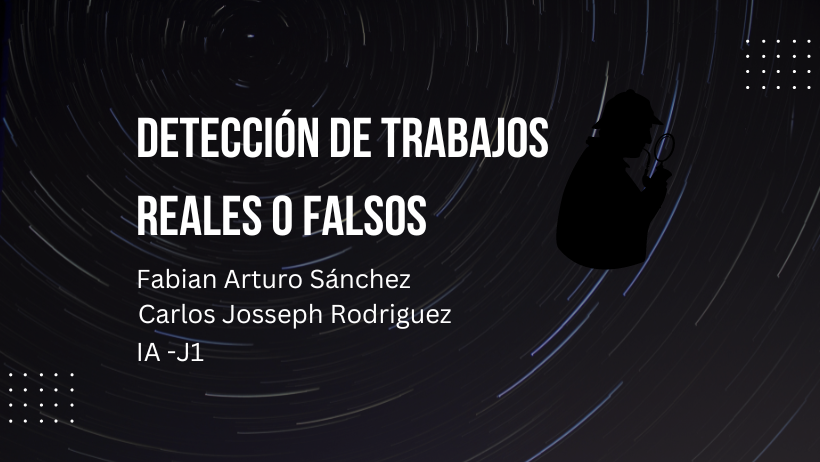

In [ ]:
#@title **Detección de trabajos reales o falsos**
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/Proyecto IA/Red and White Modern Master Gaming Facebook Cover  (1).png")

# Introduccion
El objetivo del proyecto es a traves de IA clasificar trabajos fraudulentos o reales con ayuda de este dataset el cual contiene 18000 descripciones de puestos, de las cuales unas 800 son falsas, El conjunto de datos se puede utilizar para crear modelos de clasificación que pueden aprender las descripciones u otras caracteristicas de trabajos que pueden ser fraudulentas.


#Lectura del dataset
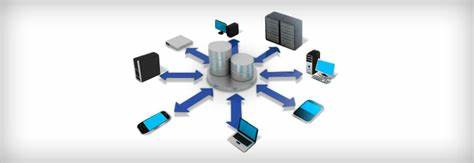

From google.colab import files https://www.kaggle.com/datasets/whenamancodes/real-or-fake-jobs files.upload()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto IA/fake_job_postings.csv')
df.head(10)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


#Limpieza del dataset

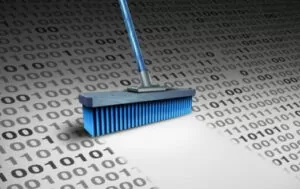


Realizamos un pulido de los datos dentro de nuestro dataset con el fin de usar unicamente la informacion que sea necesaria.


In [ ]:
df1 = df.drop(columns=["department", "salary_range","benefits",
"industry", "function","company_profile"])


#Clasificacion y tratamientos de datos

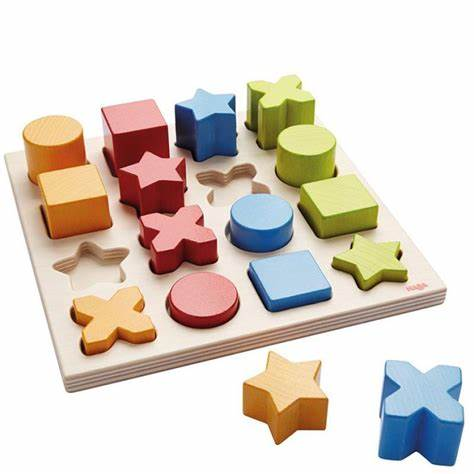

en esta seccion vamos a clasificar toda la informacion dentro de nuestro data set con el fin de hacerla mas versatil para nuestro proyecto, a continuacion podremos encontrar las funciones usadas para hacer toda la clasificacion y distribucion de datos dentro de nuestro dataset:

In [ ]:
df1.dropna(inplace=True)

df1['description'] = df1.description.apply(lambda x: len(x.split()))
df1['title'] = df1.title.apply(lambda x: len(x.split()))
df1['requirements'] = df1.requirements.apply(lambda x: len(x.split()))

location = list(pd.Categorical(df1['location']).categories)
df1['location'].replace(location, range(len(location)), inplace=True)

In [ ]:
location = list(pd.Categorical(df1['location']).categories)
df1['location'].replace(location, range(len(location)), inplace=True)

employment_type = list(pd.Categorical(df1['employment_type']).categories)
df1['employment_type'].replace(employment_type, range(len(employment_type)), inplace=True)

required_experience = list(pd.Categorical(df1['required_experience']).categories)
df1['required_experience'].replace(required_experience, range(len(required_experience)), inplace=True)

required_education = list(pd.Categorical(df1['required_education']).categories)
df1['required_education'].replace(required_education, range(len(required_education)), inplace=True)

df1

,job_id,title,location,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
3,4,5,961,346,176,0,1,0,1,5,1,0
4,5,3,982,168,89,0,1,1,1,5,1,0
6,7,4,105,57,77,0,1,1,1,5,5,0
9,10,6,759,150,93,0,1,0,3,2,4,0
10,11,8,1318,323,323,0,0,0,1,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17865,17866,9,326,211,129,0,1,1,1,2,1,0
17867,17868,2,394,96,21,0,1,0,1,2,9,0
17870,17871,4,806,121,39,0,1,1,1,5,1,0
17876,17877,2,1521,161,111,0,1,1,1,5,1,0


In [ ]:
import sklearn
df_ale=sklearn.utils.shuffle(df1)
df_ale

,job_id,title,location,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
3396,3397,5,1688,25,21,0,1,1,0,2,1,0
6308,6309,3,1666,347,41,0,1,1,1,2,9,0
7506,7507,3,964,331,623,0,1,0,0,5,1,0
2519,2520,2,379,110,18,0,1,0,1,5,9,0
9410,9411,4,640,201,25,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4484,4485,2,1703,144,38,0,1,1,3,2,8,0
3373,3374,13,1661,219,33,0,1,1,1,1,1,0
16251,16252,3,683,154,198,0,1,1,1,5,1,0
1572,1573,2,1162,123,121,0,1,0,1,6,9,0


In [ ]:
ax= df_ale['fraudulent'].value_counts().sort_values()
ax

1     331
0    7486
Name: fraudulent, dtype: int64

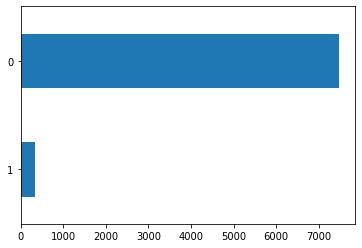

In [ ]:
ax= df_ale['fraudulent'].value_counts().sort_values().plot(kind = 'barh')

##Implementacion de algoritmos de MACHINE LEARNING

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

d = df_ale
print(d.shape)
feature_cols = ['telecommuting','has_company_logo','has_questions','title',	'location',	'description',	'requirements',	'telecommuting',	'employment_type',	'required_experience'	,'required_education'	]
X = d[feature_cols] 
y = d.fraudulent 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)



(7817, 12)


#GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
est = GaussianNB()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9181585677749361


#Decision Tree classifier 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
est = DecisionTreeClassifier(max_depth=10)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))


0.960997442455243


In [ ]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

est = DecisionTreeClassifier(max_depth=10)

s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.964 (+/- 0.00301)
tpr      0.470 (+/- 0.02979)
tnr      0.986 (+/- 0.00224)


In [ ]:
est.fit(X_train,y_train)
est.feature_importances_

array([0.00323207, 0.03867631, 0.02903735, 0.04073947, 0.2819246 ,
       0.24865121, 0.18111511, 0.        , 0.03002037, 0.0513376 ,
       0.09526592])

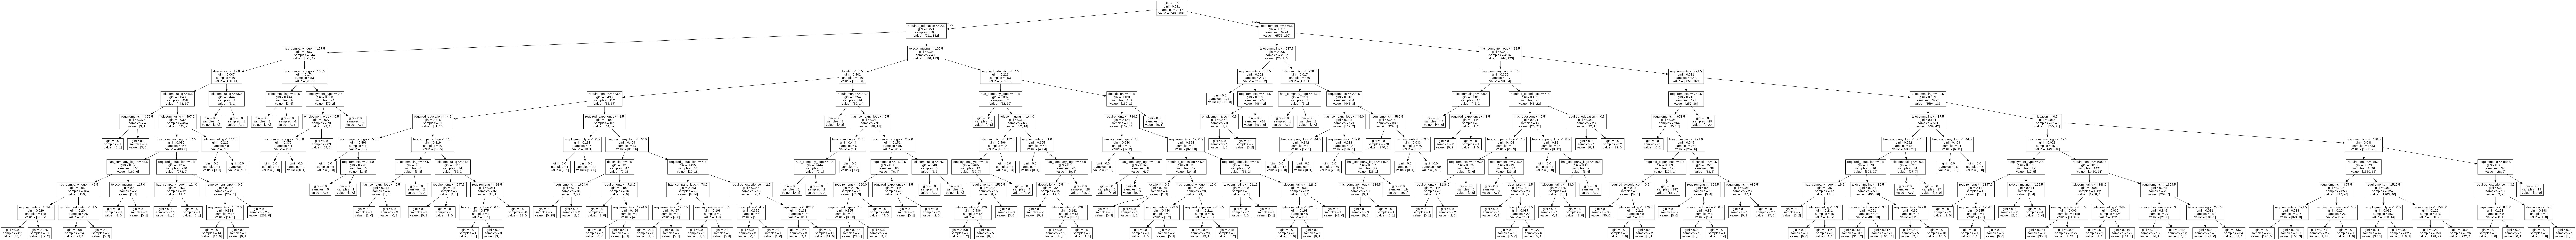

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
est.fit(X, y)
export_graphviz(est, out_file='tree_c.dot', feature_names=d.columns[:-1].values)
!dot -Tpng tree_c.dot > tree_c.png

Image(filename='tree_c.png') 

#Random Forest classifier 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
est = RandomForestClassifier(n_estimators=70)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9731457800511509


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

est = RandomForestClassifier()

s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.976 (+/- 0.00258)
tpr      0.448 (+/- 0.09997)
tnr      0.999 (+/- 0.00078)


#Support vector machine 


In [ ]:
from sklearn.svm import SVC
est = SVC()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9526854219948849


In [ ]:
est = SVC(kernel='linear')
est.fit(X_train, y_train)
print(accuracy_score(est.predict(X_test), y_test))

In [ ]:
est = SVC(kernel='poly')
est.fit(X_train, y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9526854219948849


In [ ]:
est = SVC(kernel='sigmoid')
est.fit(X_train, y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9526854219948849


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

est = SVC()

s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.958 (+/- 0.00301)
tpr      0.000 (+/- 0.00000)
tnr      1.000 (+/- 0.00000)
